#Практическая работа №1
##Предварительная обработка данных
Выполнила Фонград Анастасия Андреевна КИ21-16/1б
##Цель работы
Знакомство с основными задачами предварительной обработки исходных данных, изучение основных методов предварительной обработки данных формирование навыков выполнения предварительной обработки исходных данных с помощью языка программирования Python.
##Задачи
Выполнение практической работы предполагает решение следующий задач:
1. Визуальный анализ исходных данных
2. Поиск аномальных значений
3. Поиск и восстановление отсутствующих значений
4. Преобразование данных


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.impute
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from scipy.stats import sigmaclip

Был произведён импорт данных из .xlsx файла

In [219]:
data = pd.read_excel("C:\\Users\\fongr\\Documents\\Мои документы\\Второй курс\\python\\scientificProject\\data\\first_practice_dataframe.xlsx", sheet_name="Sheet1")
PROFICIENCY_LEVEL = "cat10_proficiencyLevel"
AGE = "cat9_age"
NUM_1 = "num1_24"
NUM_2 = "num2_24"
NUM_3 = "num3_24"
headers = [PROFICIENCY_LEVEL, AGE, NUM_1, NUM_2, NUM_3]
frame = pd.DataFrame(data[headers])
print(frame)

    cat10_proficiencyLevel            cat9_age      num1_24      num2_24  \
0                 Advanced      below 21 years   907.348256   242.734013   
1                   Novice  59 years and above   962.219776  1035.400665   
2                   Novice  59 years and above  1053.680910  -469.064161   
3                 Advanced  59 years and above  1148.702980  2793.294228   
4                 Advanced  59 years and above  1018.119147  -954.043533   
..                     ...                 ...          ...          ...   
995               Advanced      below 21 years   815.379375  -154.418945   
996                 novice  59 years and above  1195.478914  -572.061291   
997                 Novice      21 to 35 years   762.115010  -596.334731   
998                 Novice  59 years and above   730.372126 -1101.408593   
999               Advanced      36 to 58 years  1015.521911   838.290002   

        num3_24  
0    971.167308  
1    933.449443  
2    950.209325  
3    942.957073

##Визуальный анализ данных
Были построены несколько видов графиков для каждого из столбцов таблицы

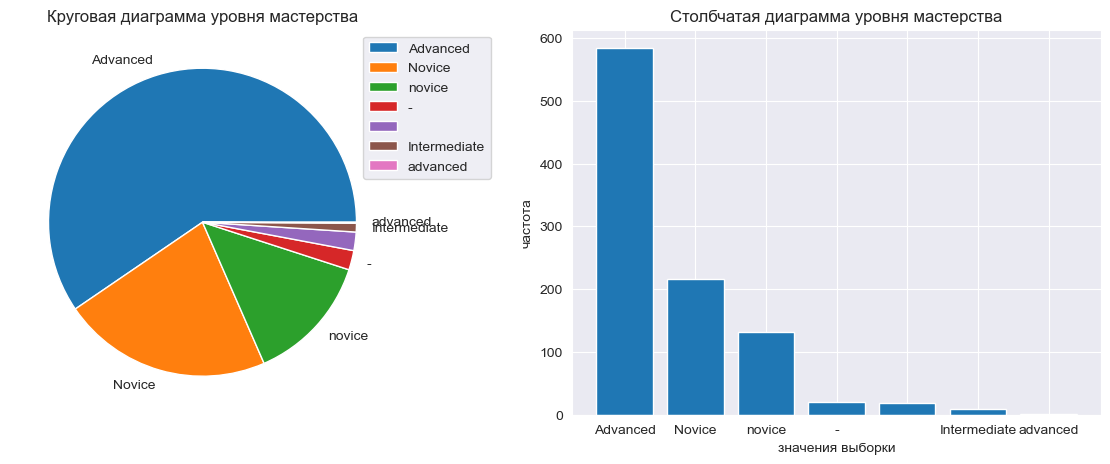

In [220]:
proficiency = frame[PROFICIENCY_LEVEL].value_counts()
fig = plt.figure(figsize=(15, 5))
# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)
ax.pie(proficiency.values, labels=proficiency.index)
ax.legend(bbox_to_anchor=(0.9, 1))
ax.set_title("Круговая диаграмма уровня мастерства")
ax2.bar(x=proficiency.index, height=proficiency.values)
ax2.set_title("Столбчатая диаграмма уровня мастерства")
plt.setp([ax2], xlabel='значения выборки', ylabel='частота')
plt.show()

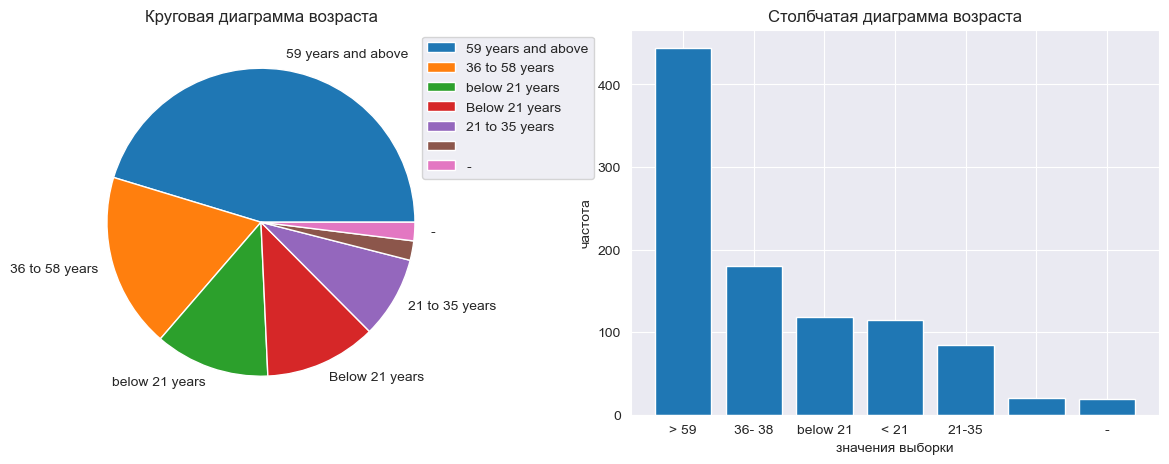

In [221]:
age = frame[AGE].value_counts()
fig = plt.figure(figsize=(15, 5))
# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)
ax.pie(age.values, labels=age.index)
ax.legend(bbox_to_anchor=(0.9, 1))
ax.set_title("Круговая диаграмма возраста")
ax2.bar(x=age.index, height=age.values)
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax2.set_xticklabels(['> 59', '36- 38', 'below 21', '< 21', '21-35', "", "-"])
ax2.set_title("Столбчатая диаграмма возраста")
plt.setp([ax2], xlabel='значения выборки', ylabel='частота')
plt.show()

Для построения графиков числовых параметров из них были временно удалены пустые значения. Это позволило избежать ошибок при построении

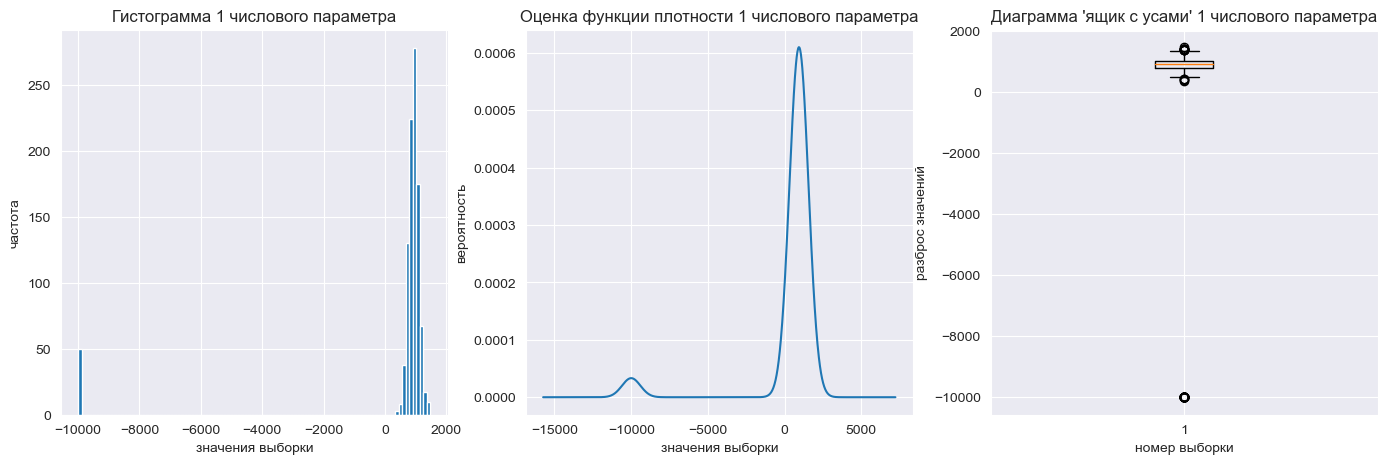

In [222]:
num1 = frame[NUM_1].dropna()
n_bins = len(num1)
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)
ax.hist(num1, bins=100)
ax.set_title("Гистограмма 1 числового параметра")
ax2.boxplot(x=num1, data=frame)
ax3.set_title("Оценка функции плотности 1 числового параметра")
ax2.set_title("Диаграмма 'ящик с усами' 1 числового параметра")
data[NUM_1].plot.kde()
plt.setp([ax, ax3], xlabel='значения выборки')
plt.setp([ax2], xlabel='номер выборки', ylabel='разброс значений')
plt.setp([ax], ylabel='частота')
plt.setp([ax3], ylabel='вероятность')
plt.show()

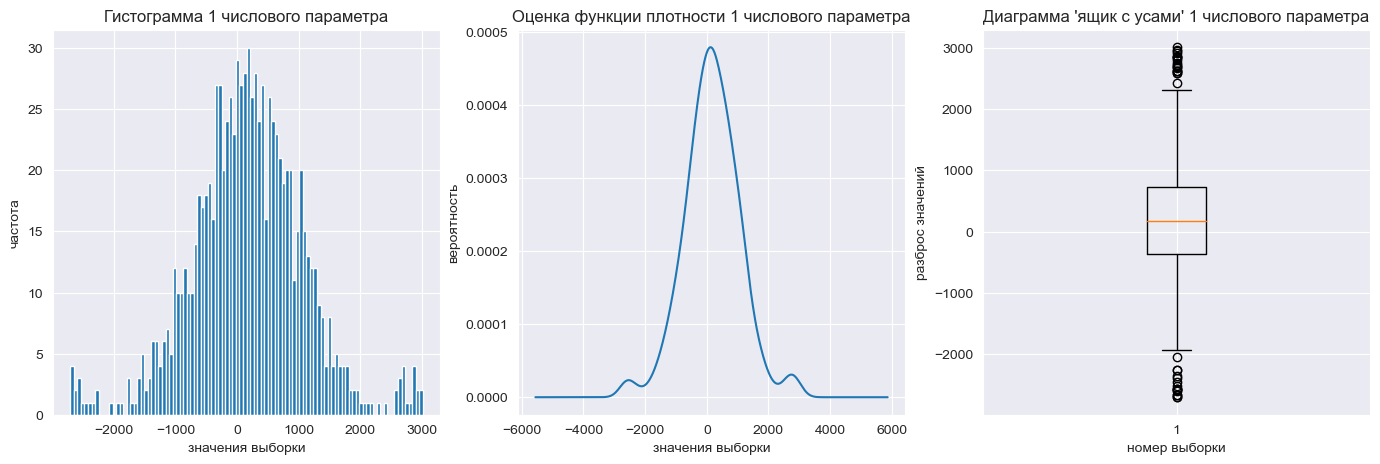

In [223]:
num2 = frame[NUM_2].dropna()
# n_bins = len(num2)
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)
ax.hist(num2, bins=100)
ax2.boxplot(x=num2, data=frame)
num2.plot.kde()
ax.set_title("Гистограмма 1 числового параметра")
ax3.set_title("Оценка функции плотности 1 числового параметра")
ax2.set_title("Диаграмма 'ящик с усами' 1 числового параметра")
plt.setp([ax, ax2, ax3], xlabel='значения выборки')
plt.setp([ax], ylabel='частота')
plt.setp([ax3], ylabel='вероятность')
plt.setp([ax2], xlabel='номер выборки', ylabel='разброс значений')
plt.show()

Построение графиков для последнего параметра оказалось невозможным, так как он содержит нечисловые значения

In [224]:
frame[NUM_3].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: num3_24
Non-Null Count  Dtype 
--------------  ----- 
972 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


##Поиск аномальных значений
По графикам видно, что некоторые из значений таблицы являются некорректными. Наблюдаются пропуски значений, выбросы, ошибки в именах категорий. Метод info() показывает, что 3 из 5 колонок имеют неверный тип

In [225]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cat10_proficiencyLevel  981 non-null    object 
 1   cat9_age                980 non-null    object 
 2   num1_24                 1000 non-null   float64
 3   num2_24                 950 non-null    float64
 4   num3_24                 972 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


###Изменение качественных признаков

Всем пустым значениям был присвоен тип None. Первая буква всех названий категорий была заменена на прописную

In [226]:
frame.loc[frame[PROFICIENCY_LEVEL]=='-', PROFICIENCY_LEVEL] = np.nan
frame.loc[frame[PROFICIENCY_LEVEL]=='', PROFICIENCY_LEVEL] = np.nan
frame.loc[frame[PROFICIENCY_LEVEL]==' ', PROFICIENCY_LEVEL] = np.nan
frame.loc[frame[PROFICIENCY_LEVEL]=='novice', PROFICIENCY_LEVEL] = "Novice"
frame.loc[frame[PROFICIENCY_LEVEL]=='advanced', PROFICIENCY_LEVEL] = "Advanced"
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].fillna(np.nan)
frame[PROFICIENCY_LEVEL].unique()

array(['Advanced', 'Novice', nan, 'Intermediate'], dtype=object)

In [227]:
frame.loc[frame[AGE]=='-', AGE] = np.nan
frame.loc[frame[AGE]=='', AGE] = np.nan
frame.loc[frame[AGE]==' ', AGE] = np.nan
frame.loc[frame[AGE]=='below 21 years', AGE] = "Below 21 years"
frame[AGE] = frame[AGE].fillna(np.nan)
frame[AGE].unique()

array(['Below 21 years', '59 years and above', '21 to 35 years',
       '36 to 58 years', nan], dtype=object)

Первая и вторая колонки были приведены к категориальному типу

In [228]:
frame[AGE] = frame[AGE].astype("category")
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].astype("category")

###Изменение количественных признаков
Пустые значения 3 числового признака были заменены на значение NaN.

In [229]:
frame.loc[frame[NUM_3]=='-', NUM_3] = float('nan')
frame.loc[frame[NUM_3]=='', NUM_3] = float('nan')
frame.loc[frame[NUM_3]==' ', NUM_3] = float('nan')
frame[NUM_3] = frame[NUM_3].fillna(np.NaN)

Для обновлённого последнего столбца был построен ряд графиков

   cat10_proficiencyLevel            cat9_age      num1_24      num2_24  \
0                Advanced      Below 21 years   907.348256   242.734013   
1                  Novice  59 years and above   962.219776  1035.400665   
2                  Novice  59 years and above  1053.680910  -469.064161   
3                Advanced  59 years and above  1148.702980  2793.294228   
4                Advanced  59 years and above  1018.119147  -954.043533   
..                    ...                 ...          ...          ...   
95                 Novice  59 years and above   953.151434    23.199822   
96               Advanced      21 to 35 years  1294.493947   451.068492   
97               Advanced  59 years and above  1012.772123  2309.473570   
98               Advanced  59 years and above  1111.247566          NaN   
99               Advanced      36 to 58 years   928.333652 -1065.107160   

       num3_24  
0   971.167308  
1   933.449443  
2   950.209325  
3   942.957073  
4   947.163814

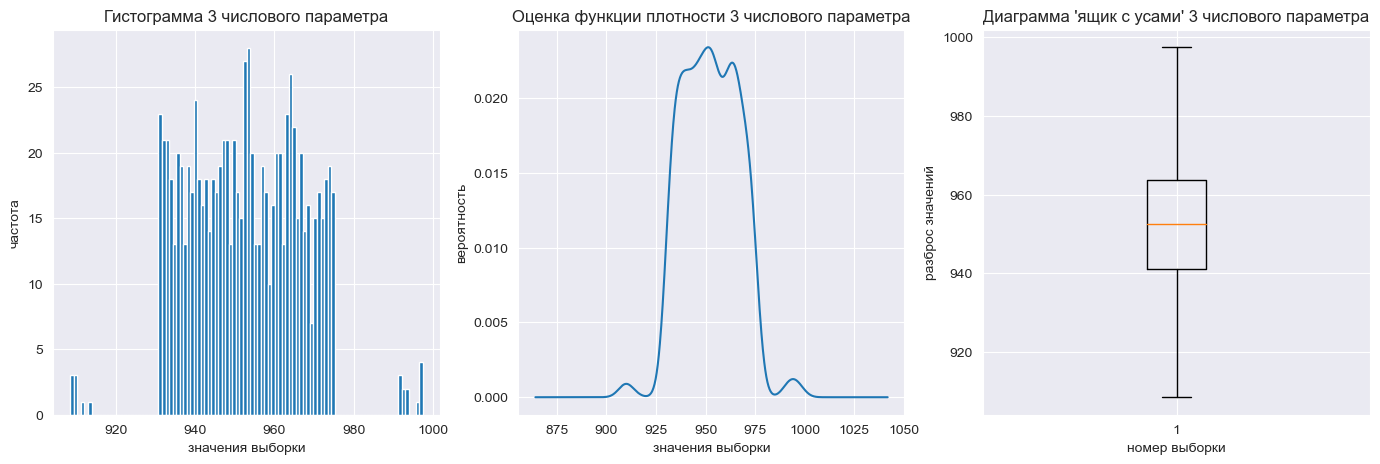

In [230]:
num3 = frame[NUM_3].dropna()
print(frame.head(100))
# n_bins = len(num2)
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)
ax.hist(num3, bins=100)
ax2.boxplot(x=num3, data=frame)
num3.plot.kde()
ax.set_title("Гистограмма 3 числового параметра")
ax3.set_title("Оценка функции плотности 3 числового параметра")
ax2.set_title("Диаграмма 'ящик с усами' 3 числового параметра")
plt.setp([ax, ax2, ax3], xlabel='значения выборки')
plt.setp([ax], ylabel='частота')
plt.setp([ax3], ylabel='вероятность')
plt.setp([ax2], xlabel='номер выборки', ylabel='разброс значений')
plt.show()

Теперь все качественные признаки имеют тип category, а все количественные - float64

In [231]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   cat10_proficiencyLevel  942 non-null    category
 1   cat9_age                941 non-null    category
 2   num1_24                 1000 non-null   float64 
 3   num2_24                 950 non-null    float64 
 4   num3_24                 916 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 25.8 KB


##Поиск и восстановление пропущенных значений
###Метод k ближайших соседей
Пропуски в третьем количественном признаке были заменены на значения, полученные методом ближайших соседей

In [232]:
df_copy = frame.copy()          # копируем датафрейм, чтоб сохранить значение колонок до заполнения
knn_inputer = sklearn.impute.KNNImputer()
inputed_df = knn_inputer.fit_transform(df_copy[[NUM_1, NUM_2, NUM_3]])
frame[NUM_3] = inputed_df[:, 2]
frame

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24
0,Advanced,Below 21 years,907.348256,242.734013,971.167308
1,Novice,59 years and above,962.219776,1035.400665,933.449443
2,Novice,59 years and above,1053.680910,-469.064161,950.209325
3,Advanced,59 years and above,1148.702980,2793.294228,942.957073
4,Advanced,59 years and above,1018.119147,-954.043533,947.163814
...,...,...,...,...,...
995,Advanced,Below 21 years,815.379375,-154.418945,961.201375
996,Novice,59 years and above,1195.478914,-572.061291,954.136037
997,Novice,21 to 35 years,762.115010,-596.334731,955.746237
998,Novice,59 years and above,730.372126,-1101.408593,953.369459


Для устранения пропусков в первом качественном признаке методом k ближайших соседей, их значения были приведены к целочисленным кодам

In [233]:
frame[PROFICIENCY_LEVEL].value_counts()

Advanced        585
Novice          348
Intermediate      9
Name: cat10_proficiencyLevel, dtype: int64

Присвоим значениям первого категориального признака числовые коды

In [234]:
le = LabelEncoder()
frame[PROFICIENCY_LEVEL] = le.fit_transform(frame[PROFICIENCY_LEVEL])
frame[PROFICIENCY_LEVEL].value_counts()

0    585
2    348
3     58
1      9
Name: cat10_proficiencyLevel, dtype: int64

По выводу value_counts видно, что значениям None был присвоен числовой код 3. Вернём их в None и заполним методом k ближайших соседей.

In [235]:
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].replace({3: None})
df_copy = frame.copy()
knn_inputer = sklearn.impute.KNNImputer()
inputed_df = knn_inputer.fit_transform(df_copy[[PROFICIENCY_LEVEL, NUM_1, NUM_2, NUM_3]])
frame[PROFICIENCY_LEVEL] = inputed_df[:, 0]
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].apply(
    lambda x: round(x) # Округляем значения до целого числа
)
print(frame[PROFICIENCY_LEVEL].value_counts())
frame[PROFICIENCY_LEVEL]

0    599
2    355
1     46
Name: cat10_proficiencyLevel, dtype: int64


0      0
1      2
2      2
3      0
4      0
      ..
995    0
996    2
997    2
998    2
999    0
Name: cat10_proficiencyLevel, Length: 1000, dtype: int64

Для обратного кодирования можно воспользоваться методом inverse_transform

In [236]:
frame[PROFICIENCY_LEVEL] = le.inverse_transform(frame[PROFICIENCY_LEVEL])
frame[PROFICIENCY_LEVEL].value_counts()

Advanced        599
Novice          355
Intermediate     46
Name: cat10_proficiencyLevel, dtype: int64

Пропуски в 1 и 2 количественных признаках были заполнены средним и медианным значениями соответственно

In [237]:
median = frame[NUM_2].median()
average = frame[NUM_1].mean()
frame[NUM_1] = frame[NUM_1].fillna(average)
frame[NUM_2] = frame[NUM_2].fillna(median)

Пропуски значений второго признака были заполнены самым популярным значением

In [238]:
print(frame[AGE].value_counts())
frame[AGE] = frame[AGE].fillna("59 years and above")

59 years and above    444
Below 21 years        233
36 to 58 years        180
21 to 35 years         84
Name: cat9_age, dtype: int64


##Удаление аномальных значений
Были сделаны 3 копии исходного фрейма

In [239]:
frame_copy = frame.copy()
frame_quantile = frame.copy()
frame_sigma = frame.copy()

###Поиск аномальных значений методом сигм
Были найдены выбросы значений для 1 числового параметра. Строки, содержащие выбросы, были удалены из фрейма.

In [240]:
_, low, upp = sigmaclip(frame_sigma[NUM_1], 3, 3)
dropped_values = frame_sigma[NUM_1][(frame_sigma[NUM_1] < low) | (frame_sigma[NUM_1] > upp)]
frame_sigma = frame_sigma.drop(dropped_values.index, axis=0)

Аналогичным способом были удалены выбросы для 2 и 3 параметров. Функция sigmaclip не работает корректно со значениями типа nan. Поэтому пришлось заменить их нулями

In [241]:
_, low, upp = sigmaclip(frame_sigma[NUM_2], 3, 3)
dropped_values = frame_sigma[NUM_2][(frame_sigma[NUM_2] < low) | (frame_sigma[NUM_2] > upp)]
frame_sigma = frame_sigma.drop(dropped_values.index)
_, low, upp = sigmaclip(frame_sigma[NUM_3], 3, 3)
dropped_values = frame_sigma[NUM_3][(frame_sigma[NUM_3] < low) | (frame_sigma[NUM_3] > upp)]
frame_sigma = frame_sigma.drop(dropped_values.index)
frame_sigma

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24
0,Advanced,Below 21 years,907.348256,242.734013,971.167308
1,Novice,59 years and above,962.219776,1035.400665,933.449443
2,Novice,59 years and above,1053.680910,-469.064161,950.209325
4,Advanced,59 years and above,1018.119147,-954.043533,947.163814
5,Novice,59 years and above,781.003970,-406.560281,948.073989
...,...,...,...,...,...
995,Advanced,Below 21 years,815.379375,-154.418945,961.201375
996,Novice,59 years and above,1195.478914,-572.061291,954.136037
997,Novice,21 to 35 years,762.115010,-596.334731,955.746237
998,Novice,59 years and above,730.372126,-1101.408593,953.369459


###Поиск аномальных значений методом квантилей

In [242]:
def outlier_estimation(data_frame, column):
    q25 = data_frame[column].quantile(0.25)
    q75 = data_frame[column].quantile(0.75)
    delta = q75 - q25
    inside_border = [(q25 - 1.5 * delta), (q75 + 1.5 * delta)] # Незначительный выброс
    outside_border = [(q25 - 3 * delta), (q75 + 3 * delta)] # Значительный выброс
    return inside_border

In [243]:
low, high = outlier_estimation(frame_quantile, NUM_1)
dropped_values = frame_quantile[NUM_1][(frame_quantile[NUM_1] < low) | (frame_quantile[NUM_1] > high)]
frame_quantile = frame_quantile.drop(dropped_values.index)

In [244]:
low, high = outlier_estimation(frame_quantile, NUM_2)
dropped_values = frame_quantile[NUM_2][(frame_quantile[NUM_2] < low) | (frame_quantile[NUM_2] > high)]
frame_quantile = frame_quantile.drop(dropped_values.index)
low, high = outlier_estimation(frame_quantile, NUM_3)
dropped_values = frame_quantile[NUM_3][(frame_quantile[NUM_3] < low) | (frame_quantile[NUM_3] > high)]
frame_quantile = frame_quantile.drop(dropped_values.index)
frame_quantile

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24
0,Advanced,Below 21 years,907.348256,242.734013,971.167308
1,Novice,59 years and above,962.219776,1035.400665,933.449443
2,Novice,59 years and above,1053.680910,-469.064161,950.209325
4,Advanced,59 years and above,1018.119147,-954.043533,947.163814
5,Novice,59 years and above,781.003970,-406.560281,948.073989
...,...,...,...,...,...
995,Advanced,Below 21 years,815.379375,-154.418945,961.201375
996,Novice,59 years and above,1195.478914,-572.061291,954.136037
997,Novice,21 to 35 years,762.115010,-596.334731,955.746237
998,Novice,59 years and above,730.372126,-1101.408593,953.369459


Использование метода сигм позволило удалить 115 значения из фрейма, а метода квантилей - 111 значений. Метод сигм оказался немного более сильным.

In [245]:
frame = frame_sigma

Ниже представлены гистограммы колонок очищенного от выбросов распределения

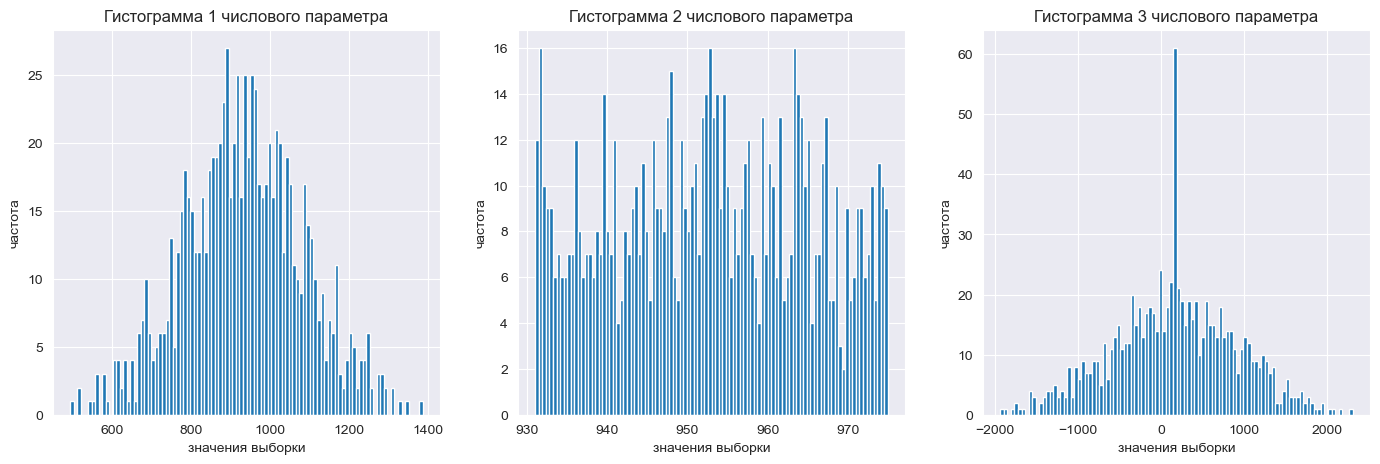

In [246]:
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)
ax.hist(frame[NUM_1], bins=100)
ax2.hist(frame[NUM_2], bins=100)
ax3.hist(frame[NUM_3], bins=100)
ax.set_title("Гистограмма 1 числового параметра")
ax3.set_title("Гистограмма 2 числового параметра")
ax2.set_title("Гистограмма 3 числового параметра")
plt.setp([ax, ax2, ax3], xlabel='значения выборки', ylabel='частота')
plt.show()

##Преобразование данных
###Кодировка категориальных признаков
Первый категориальный признак был закодирован с помощью one-hot encoding

In [247]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(frame[[PROFICIENCY_LEVEL]]).toarray(), columns=frame[PROFICIENCY_LEVEL].unique())
frame = frame.join(enc_df)
frame

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24,Advanced,Novice,Intermediate
0,Advanced,Below 21 years,907.348256,242.734013,971.167308,1.0,0.0,0.0
1,Novice,59 years and above,962.219776,1035.400665,933.449443,0.0,0.0,1.0
2,Novice,59 years and above,1053.680910,-469.064161,950.209325,0.0,0.0,1.0
4,Advanced,59 years and above,1018.119147,-954.043533,947.163814,0.0,0.0,1.0
5,Novice,59 years and above,781.003970,-406.560281,948.073989,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,Advanced,Below 21 years,815.379375,-154.418945,961.201375,NaN,NaN,NaN
996,Novice,59 years and above,1195.478914,-572.061291,954.136037,NaN,NaN,NaN
997,Novice,21 to 35 years,762.115010,-596.334731,955.746237,NaN,NaN,NaN
998,Novice,59 years and above,730.372126,-1101.408593,953.369459,NaN,NaN,NaN


Второй категориальный признак был закодирован с помощью label encoding

In [251]:
frame[AGE] = le.fit_transform(frame[AGE])
frame[AGE].value_counts()

2    445
3    211
1    158
0     71
Name: cat9_age, dtype: int64

###Преобразование количественных признаков
Нормализованный набор данных всегда будет иметь значения в диапазоне от 0 до 1.
Стандартизированный набор данных будет иметь среднее значение 0 и стандартное отклонение 1
Первый количественный признак был приведён к нормализованному виду

In [249]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(frame[[NUM_1]])
frame["num_1_scaled"] = scaled_values

Второй и третий количественные признаки были приведены к стандартизованному виду

In [250]:
scaler_std = StandardScaler()
scaled_values = scaler_std.fit_transform(frame[[NUM_2, NUM_3]])
frame[["num_2_scaled", "num_3_scaled"]] = scaled_values
frame.head(5)

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24,Advanced,Novice,Intermediate,num_1_scaled,num_2_scaled,num_3_scaled
0,Advanced,3,907.348256,242.734013,971.167308,1.0,0.0,0.0,0.463016,0.111108,1.491350
1,Novice,2,962.219776,1035.400665,933.449443,0.0,0.0,1.0,0.524437,1.168526,-1.574341
2,Novice,2,1053.680910,-469.064161,950.209325,0.0,0.0,1.0,0.626815,-0.838433,-0.212105
4,Advanced,2,1018.119147,-954.043533,947.163814,0.0,0.0,1.0,0.587009,-1.485396,-0.459643
5,Novice,2,781.003970,-406.560281,948.073989,1.0,0.0,0.0,0.321591,-0.755052,-0.385665
